In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [4]:
df.head(4)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

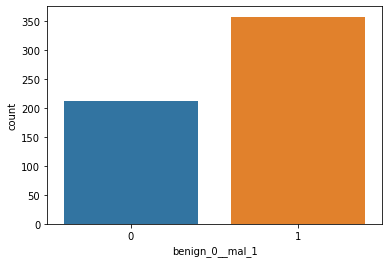

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

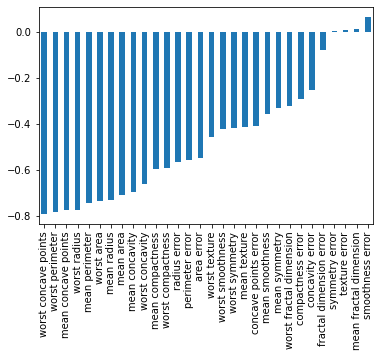

In [9]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

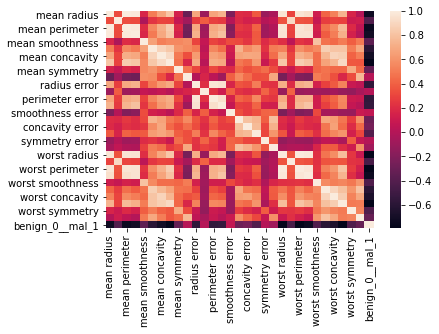

In [10]:
sns.heatmap(df.corr())

In [12]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [20]:
X_train = scaler.fit_transform(X_train)

In [21]:
X_test = scaler.transform(X_test)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [26]:
model = Sequential()

In [27]:
X_train.shape

(398, 30)

In [28]:
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

##Binary Classification
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [29]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
13/13 [==============================] - 1s 14ms/step - loss: 0.6855 - val_loss: 0.6733
Epoch 2/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6522 - val_loss: 0.6424
Epoch 3/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.6033
Epoch 4/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5715 - val_loss: 0.5584
Epoch 5/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5277 - val_loss: 0.5127
Epoch 6/600
13/13 [==============================] - 0s 3ms/step - loss: 0.4790 - val_loss: 0.4667
Epoch 7/600
13/13 [==============================] - 0s 3ms/step - loss: 0.4301 - val_loss: 0.4217
Epoch 8/600
13/13 [==============================] - 0s 3ms/step - loss: 0.3844 - val_loss: 0.3768
Epoch 9/600
13/13 [==============================] - 0s 3ms/step - loss: 0.3399 - val_loss: 0.3354
Epoch 10/600
13/13 [==============================] - 0s 2ms/step - loss: 0.3009 - val_loss: 0.3020
Epoch 11

Epoch 83/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0402 - val_loss: 0.1464
Epoch 84/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0380 - val_loss: 0.1468
Epoch 85/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0386 - val_loss: 0.1466
Epoch 86/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0377 - val_loss: 0.1471
Epoch 87/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0372 - val_loss: 0.1472
Epoch 88/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0389 - val_loss: 0.1478
Epoch 89/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0393 - val_loss: 0.1472
Epoch 90/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0400 - val_loss: 0.1494
Epoch 91/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0417 - val_loss: 0.1483
Epoch 92/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0406 - val_loss: 0.1510


13/13 [==============================] - 0s 3ms/step - loss: 0.0368 - val_loss: 0.1818
Epoch 165/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0261 - val_loss: 0.1831
Epoch 166/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0320 - val_loss: 0.1856
Epoch 167/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0255 - val_loss: 0.1884
Epoch 168/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0268 - val_loss: 0.1884
Epoch 169/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0276 - val_loss: 0.1878
Epoch 170/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0291 - val_loss: 0.1903
Epoch 171/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0280 - val_loss: 0.1889
Epoch 172/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0257 - val_loss: 0.1911
Epoch 173/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0252 - val_loss: 0.1913
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 0.0233 - val_loss: 0.2307
Epoch 246/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0199 - val_loss: 0.2315
Epoch 247/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0194 - val_loss: 0.2288
Epoch 248/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0223 - val_loss: 0.2319
Epoch 249/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0179 - val_loss: 0.2338
Epoch 250/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0208 - val_loss: 0.2312
Epoch 251/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0230 - val_loss: 0.2289
Epoch 252/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0231 - val_loss: 0.2303
Epoch 253/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0186 - val_loss: 0.2307
Epoch 254/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0187 - val_loss: 0.2331
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 0.0141 - val_loss: 0.2825
Epoch 327/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0141 - val_loss: 0.2876
Epoch 328/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0143 - val_loss: 0.2871
Epoch 329/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0130 - val_loss: 0.2875
Epoch 330/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0137 - val_loss: 0.2921
Epoch 331/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0138 - val_loss: 0.2942
Epoch 332/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0131 - val_loss: 0.2914
Epoch 333/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0141 - val_loss: 0.2955
Epoch 334/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0128 - val_loss: 0.2953
Epoch 335/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0138 - val_loss: 0.2966
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.0102 - val_loss: 0.3763
Epoch 408/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.3796
Epoch 409/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.3812
Epoch 410/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0092 - val_loss: 0.3789
Epoch 411/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.3805
Epoch 412/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.3825
Epoch 413/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0110 - val_loss: 0.3839
Epoch 414/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0130 - val_loss: 0.3819
Epoch 415/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0108 - val_loss: 0.3807
Epoch 416/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0119 - val_loss: 0.3796
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 0.0057 - val_loss: 0.4766
Epoch 489/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0058 - val_loss: 0.4796
Epoch 490/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.4882
Epoch 491/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 0.4902
Epoch 492/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0060 - val_loss: 0.4904
Epoch 493/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0058 - val_loss: 0.4937
Epoch 494/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0058 - val_loss: 0.4923
Epoch 495/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.4964
Epoch 496/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0057 - val_loss: 0.4994
Epoch 497/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.4957
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 0.5946
Epoch 570/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.5918
Epoch 571/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.5948
Epoch 572/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.6016
Epoch 573/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.6011
Epoch 574/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.6034
Epoch 575/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.5986
Epoch 576/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.6102
Epoch 577/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.6097
Epoch 578/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0041 - val_loss: 0.6152
Epoc

In [34]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

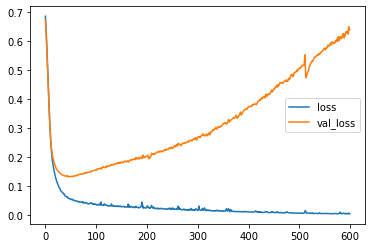

In [35]:
loss_df.plot()

In [36]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

##Binary Classification
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 | 

In [39]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [40]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 1s 11ms/step - loss: 0.6858 - val_loss: 0.6667
Epoch 2/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6538 - val_loss: 0.6385
Epoch 3/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6229 - val_loss: 0.6080
Epoch 4/600
13/13 [==============================] - 0s 2ms/step - loss: 0.5895 - val_loss: 0.5755
Epoch 5/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5533 - val_loss: 0.5369
Epoch 6/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5113 - val_loss: 0.4956
Epoch 7/600
13/13 [==============================] - 0s 3ms/step - loss: 0.4677 - val_loss: 0.4524
Epoch 8/600
13/13 [==============================] - 0s 3ms/step - loss: 0.4242 - val_loss: 0.4079
Epoch 9/600
13/13 [==============================] - 0s 3ms/step - loss: 0.3810 - val_loss: 0.3670
Epoch 10/600
13/13 [==============================] - 0s 3ms/step - loss: 0.3421 - val_loss: 0.3313
Epoch 11

13/13 [==============================] - 0s 3ms/step - loss: 0.0429 - val_loss: 0.1302
Epoch 84/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0414 - val_loss: 0.1303
Epoch 85/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0428 - val_loss: 0.1311
Epoch 86/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0412 - val_loss: 0.1307
Epoch 87/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0414 - val_loss: 0.1313
Epoch 88/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0407 - val_loss: 0.1309
Epoch 89/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0420 - val_loss: 0.1321
Epoch 90/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0387 - val_loss: 0.1344
Epoch 91/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0422 - val_loss: 0.1321
Epoch 92/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0422 - val_loss: 0.1309
Epoch 93/600


<AxesSubplot:>

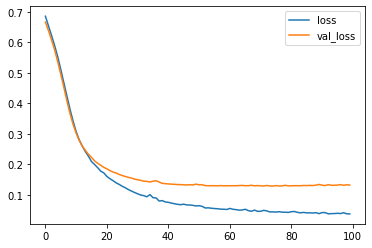

In [42]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [44]:
from tensorflow.keras.layers import Dropout

In [45]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
##Binary Classification
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [46]:

early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 1s 12ms/step - loss: 0.7701 - val_loss: 0.7052
Epoch 2/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6984 - val_loss: 0.6841
Epoch 3/600
13/13 [==============================] - 0s 3ms/step - loss: 0.7009 - val_loss: 0.6742
Epoch 4/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6893 - val_loss: 0.6685
Epoch 5/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6735 - val_loss: 0.6614
Epoch 6/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6670 - val_loss: 0.6517
Epoch 7/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6553 - val_loss: 0.6386
Epoch 8/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6440 - val_loss: 0.6203
Epoch 9/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6172 - val_loss: 0.6009
Epoch 10/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5984 - val_loss: 0.5834
Epoch 11

13/13 [==============================] - 0s 3ms/step - loss: 0.1073 - val_loss: 0.1173
Epoch 84/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0996 - val_loss: 0.1190
Epoch 85/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0867 - val_loss: 0.1187
Epoch 86/600
13/13 [==============================] - 0s 2ms/step - loss: 0.1020 - val_loss: 0.1205
Epoch 87/600
13/13 [==============================] - 0s 3ms/step - loss: 0.1142 - val_loss: 0.1243
Epoch 88/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0848 - val_loss: 0.1207
Epoch 89/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0932 - val_loss: 0.1291
Epoch 90/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0962 - val_loss: 0.1221
Epoch 91/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0887 - val_loss: 0.1192
Epoch 92/600
13/13 [==============================] - 0s 2ms/step - loss: 0.1032 - val_loss: 0.1186
Epoch 93/600


In [47]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

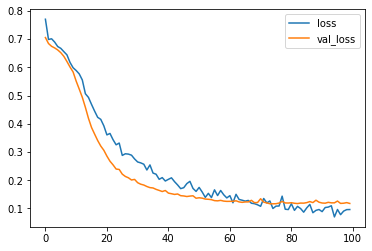

In [48]:
model_loss.plot()

In [50]:
predictions = model.predict_classes(X_test)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        66
           1       0.96      0.98      0.97       105

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [53]:
print(confusion_matrix(y_test,predictions))

[[ 62   4]
 [  2 103]]
